# Visualization_all_cgm_datas_0209

In [1]:
import pandas as pd


# Specify the file path for the .xlsl file
df = pd.read_excel('/Users/bg.lim/Downloads/Texas A&M_Agrilife/Projects/4.New_CGM/Datas/0206_CGM.xlsx', engine='openpyxl')  # 파일 경로 지정


# Display the dataframe
df

,StudyID,Timestamp,Glucose mg/dL,Relative_Day
0,1,2022-10-06 01:34:00,78,1
1,1,2022-10-06 01:49:00,76,1
2,1,2022-10-06 02:04:00,78,1
3,1,2022-10-06 02:19:00,75,1
4,1,2022-10-06 02:34:00,75,1
...,...,...,...,...
71712,89,2023-05-09 19:08:00,114,13
71713,89,2023-05-09 19:23:00,136,13
71714,89,2023-05-09 19:38:00,142,13
71715,89,2023-05-09 19:53:00,137,13


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71717 entries, 0 to 71716
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   StudyID        71717 non-null  int64         
 1   Timestamp      71717 non-null  datetime64[ns]
 2   Glucose mg/dL  71717 non-null  int64         
 3   Relative_Day   71717 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.2 MB


# make new columns (Mean, SD, GE count)

In [3]:
# Calculate mean and standard deviation for each participant
df_stats = df.groupby("StudyID")["Glucose mg/dL"].agg(["mean", "std"]).reset_index()
df_stats.rename(columns={"mean": "Mean_Glucose", "std": "Std_Glucose"}, inplace=True)

# Merge the calculated statistics back into the original dataframe
df = df.merge(df_stats, on="StudyID", how="left")

# Compute the 1SD and 1.5SD thresholds for glycemic excursions
df["Threshold_1SD"] = df["Mean_Glucose"] + df["Std_Glucose"]
df["Threshold_1.5SD"] = df["Mean_Glucose"] + 1.5 * df["Std_Glucose"]

# Display the first few rows to verify the output
print(df.head())  


   StudyID           Timestamp  Glucose mg/dL  Relative_Day  Mean_Glucose  \
0        1 2022-10-06 01:34:00             78             1     79.576598   
1        1 2022-10-06 01:49:00             76             1     79.576598   
2        1 2022-10-06 02:04:00             78             1     79.576598   
3        1 2022-10-06 02:19:00             75             1     79.576598   
4        1 2022-10-06 02:34:00             75             1     79.576598   

   Std_Glucose  Threshold_1SD  Threshold_1.5SD  
0    16.228679      95.805278       103.919617  
1    16.228679      95.805278       103.919617  
2    16.228679      95.805278       103.919617  
3    16.228679      95.805278       103.919617  
4    16.228679      95.805278       103.919617  


In [5]:
# Determine if glucose levels exceed the thresholds
df["GE_1SD"] = df["Glucose mg/dL"] > df["Threshold_1SD"]
df["GE_1.5SD"] = df["Glucose mg/dL"] > df["Threshold_1.5SD"]

# Count occurrences of exceeding thresholds per participant per day
ge_counts = df.groupby(["StudyID", "Relative_Day"]).agg(
    GE_1SD_Count=("GE_1SD", "sum"),
    GE_1.5SD_Count=("GE_1.5SD", "sum")
).reset_index()

# Merge the counts back into the original dataframe
df = df.merge(ge_counts, on=["StudyID", "Relative_Day"], how="left")

# Display the updated dataframe
print(df.head())

SyntaxError: invalid syntax (762873381.py, line 8)

In [6]:
# Ensure column names are valid (remove dots)
df = df.rename(columns={"Glucose mg/dL": "Glucose_mg_dL"})

# Determine if glucose levels exceed the thresholds
df["GE_1SD"] = df["Glucose_mg_dL"] > df["Threshold_1SD"]
df["GE_1.5SD"] = df["Glucose_mg_dL"] > df["Threshold_1.5SD"]

# Count occurrences of exceeding thresholds per participant per day
ge_counts = df.groupby(["StudyID", "Relative_Day"]).agg(
    GE_1SD_Count=("GE_1SD", "sum"),
    GE_1_5SD_Count=("GE_1.5SD", "sum")  # Fixed column name (underscore instead of dot)
).reset_index()

# Merge the counts back into the original dataframe
df = df.merge(ge_counts, on=["StudyID", "Relative_Day"], how="left")

# Display the updated dataframe
print(df.head())

# Save the processed data to a CSV file (optional)
df.to_csv("glucose_GE_counts.csv", index=False)


   StudyID           Timestamp  Glucose_mg_dL  Relative_Day  Mean_Glucose  \
0        1 2022-10-06 01:34:00             78             1     79.576598   
1        1 2022-10-06 01:49:00             76             1     79.576598   
2        1 2022-10-06 02:04:00             78             1     79.576598   
3        1 2022-10-06 02:19:00             75             1     79.576598   
4        1 2022-10-06 02:34:00             75             1     79.576598   

   Std_Glucose  Threshold_1SD  Threshold_1.5SD  GE_1SD  GE_1.5SD  \
0    16.228679      95.805278       103.919617   False     False   
1    16.228679      95.805278       103.919617   False     False   
2    16.228679      95.805278       103.919617   False     False   
3    16.228679      95.805278       103.919617   False     False   
4    16.228679      95.805278       103.919617   False     False   

   GE_1SD_Count  GE_1_5SD_Count  
0            23              12  
1            23              12  
2            23           

In [9]:
df

,StudyID,Timestamp,Glucose_mg_dL,Relative_Day,Mean_Glucose,Std_Glucose,Threshold_1SD,Threshold_1.5SD,GE_1SD,GE_1.5SD,GE_1SD_Count,GE_1_5SD_Count
0,1,2022-10-06 01:34:00,78,1,79.576598,16.228679,95.805278,103.919617,False,False,23,12
1,1,2022-10-06 01:49:00,76,1,79.576598,16.228679,95.805278,103.919617,False,False,23,12
2,1,2022-10-06 02:04:00,78,1,79.576598,16.228679,95.805278,103.919617,False,False,23,12
3,1,2022-10-06 02:19:00,75,1,79.576598,16.228679,95.805278,103.919617,False,False,23,12
4,1,2022-10-06 02:34:00,75,1,79.576598,16.228679,95.805278,103.919617,False,False,23,12
...,...,...,...,...,...,...,...,...,...,...,...,...
71712,89,2023-05-09 19:08:00,114,13,98.786058,17.435915,116.221973,124.939930,False,False,20,11
71713,89,2023-05-09 19:23:00,136,13,98.786058,17.435915,116.221973,124.939930,True,True,20,11
71714,89,2023-05-09 19:38:00,142,13,98.786058,17.435915,116.221973,124.939930,True,True,20,11
71715,89,2023-05-09 19:53:00,137,13,98.786058,17.435915,116.221973,124.939930,True,True,20,11


# Group Consecutive Exceeding Values into a Single GE Event

## Sorting data by Timestamp
## Checking if the previous measurement was already above the threshold
## Counting only new excursions (i.e., when glucose crosses the threshold for the first time in a period)

In [12]:
import numpy as np


# Ensure data is sorted for correct event detection
df = df.sort_values(by=["StudyID", "Relative_Day", "Timestamp"]).reset_index(drop=True)

# Function to count unique GE events (detects only new excursions)
def count_ge_events(group, threshold_col):
    """
    Count the number of unique GE events by detecting when glucose crosses the threshold
    and treating consecutive excursions as a single event.
    """
    exceed = group[threshold_col].values  # Convert to NumPy array for fast processing
    event_starts = np.where((exceed[:-1] == False) & (exceed[1:] == True))[0]  # Find transition points
    return len(event_starts) + (1 if exceed[0] else 0)  # Count first event if starts above threshold

# Group by StudyID and Relative_Day and apply the function
ge_counts_filtered = df.groupby(["StudyID", "Relative_Day"]).apply(lambda group: pd.Series({
    "GE_1SD_Filtered": count_ge_events(group, "GE_1SD"),
    "GE_1_5SD_Filtered": count_ge_events(group, "GE_1.5SD")
})).reset_index()

# Merge back into the main dataframe
df = df.merge(ge_counts_filtered, on=["StudyID", "Relative_Day"], how="left")

df

,StudyID,Timestamp,Glucose_mg_dL,Relative_Day,Mean_Glucose,Std_Glucose,Threshold_1SD,Threshold_1.5SD,GE_1SD,GE_1.5SD,GE_1SD_Count,GE_1_5SD_Count,GE_1SD_Filtered,GE_1_5SD_Filtered
0,1,2022-10-06 01:34:00,78,1,79.576598,16.228679,95.805278,103.919617,False,False,23,12,5,6
1,1,2022-10-06 01:49:00,76,1,79.576598,16.228679,95.805278,103.919617,False,False,23,12,5,6
2,1,2022-10-06 02:04:00,78,1,79.576598,16.228679,95.805278,103.919617,False,False,23,12,5,6
3,1,2022-10-06 02:19:00,75,1,79.576598,16.228679,95.805278,103.919617,False,False,23,12,5,6
4,1,2022-10-06 02:34:00,75,1,79.576598,16.228679,95.805278,103.919617,False,False,23,12,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71712,89,2023-05-09 19:08:00,114,13,98.786058,17.435915,116.221973,124.939930,False,False,20,11,6,5
71713,89,2023-05-09 19:23:00,136,13,98.786058,17.435915,116.221973,124.939930,True,True,20,11,6,5
71714,89,2023-05-09 19:38:00,142,13,98.786058,17.435915,116.221973,124.939930,True,True,20,11,6,5
71715,89,2023-05-09 19:53:00,137,13,98.786058,17.435915,116.221973,124.939930,True,True,20,11,6,5


In [13]:
df.to_csv("glucose_Filtered_GE_counts.csv", index=False)


# Delete unneccessary columns

In [17]:

# Drop only if the columns exist
columns_to_drop = [col for col in ["GE_1SD", "GE_1.5SD"] if col in df.columns]
df = df.drop(columns=columns_to_drop, errors='ignore')

# Save the updated dataframe to a new CSV file
df.to_csv("glucose_Filtered_GE_counts.csv", index=False)


In [18]:
df

,StudyID,Timestamp,Glucose_mg_dL,Relative_Day,Mean_Glucose,Std_Glucose,Threshold_1SD,Threshold_1.5SD,GE_1SD_Filtered,GE_1_5SD_Filtered
0,1,2022-10-06 01:34:00,78,1,79.576598,16.228679,95.805278,103.919617,5,6
1,1,2022-10-06 01:49:00,76,1,79.576598,16.228679,95.805278,103.919617,5,6
2,1,2022-10-06 02:04:00,78,1,79.576598,16.228679,95.805278,103.919617,5,6
3,1,2022-10-06 02:19:00,75,1,79.576598,16.228679,95.805278,103.919617,5,6
4,1,2022-10-06 02:34:00,75,1,79.576598,16.228679,95.805278,103.919617,5,6
...,...,...,...,...,...,...,...,...,...,...
71712,89,2023-05-09 19:08:00,114,13,98.786058,17.435915,116.221973,124.939930,6,5
71713,89,2023-05-09 19:23:00,136,13,98.786058,17.435915,116.221973,124.939930,6,5
71714,89,2023-05-09 19:38:00,142,13,98.786058,17.435915,116.221973,124.939930,6,5
71715,89,2023-05-09 19:53:00,137,13,98.786058,17.435915,116.221973,124.939930,6,5


# Visualization (Plots glucose levels over 1-14 days for 3 randomly selected participants)

Dataset Columns: Index(['StudyID', 'Timestamp', 'Glucose_mg_dL', 'Relative_Day', 'Mean_Glucose',
       'Std_Glucose', 'Threshold_1SD', 'Threshold_1.5SD', 'GE_1SD_Filtered',
       'GE_1_5SD_Filtered'],
      dtype='object')


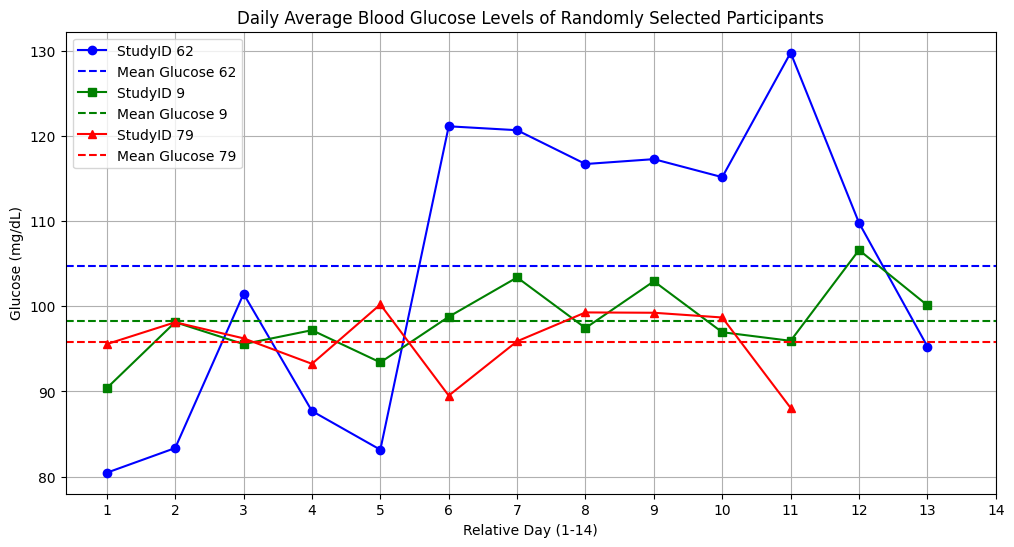


Daily GE Counts Table:
 StudyID  Relative_Day  GE_1SD_Filtered  GE_1_5SD_Filtered
       9             1                3                  3
       9             2                6                  6
       9             3                4                  2
       9             4                6                  5
       9             5                4                  2
       9             6                4                  2
       9             7                9                  4
       9             8                3                  1
       9             9                4                  3
       9            10                3                  2
       9            11                3                  4
       9            12               10                  8
       9            13                7                  4
      62             1                1                  1
      62             2                2                  1
      62             3          

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

# Load the dataset (modify the path if needed)
file_path = "glucose_Filtered_GE_counts.csv"
df = pd.read_csv(file_path)

# Ensure column names are clean (strip leading/trailing spaces)
df.columns = df.columns.str.strip()

# Verify correct column names
print("Dataset Columns:", df.columns)

# Define the correct column name for glucose measurement
glucose_col = "Glucose mg/dL" if "Glucose mg/dL" in df.columns else "Glucose_mg_dL"

# Compute daily average glucose values for each participant
df_daily_avg = df.groupby(["StudyID", "Relative_Day"])[glucose_col].mean().reset_index()

# Select 3 random participants
random_study_ids = random.sample(df["StudyID"].unique().tolist(), 3)

# Define markers and colors for each participant
markers = ['o', 's', '^']  # Circle, Square, Triangle
colors = ['blue', 'green', 'red']

# Compute overall mean glucose for dotted line
overall_mean = df[glucose_col].mean()

# Plot glucose levels over the experiment period
plt.figure(figsize=(12, 6))

# Plot daily average glucose levels for each participant
for i, study_id in enumerate(random_study_ids):
    subset = df_daily_avg[df_daily_avg["StudyID"] == study_id]

    # Plot daily average glucose with markers
    plt.plot(subset["Relative_Day"], subset[glucose_col], 
             linestyle='-', marker=markers[i], color=colors[i], label=f"StudyID {study_id}")

    # Plot participant-specific mean glucose as a dashed line
    mean_glucose = df[df["StudyID"] == study_id]["Mean_Glucose"].iloc[0]
    plt.axhline(y=mean_glucose, color=colors[i], linestyle='dashed', label=f"Mean Glucose {study_id}")

# Labels and title
plt.xlabel("Relative Day (1-14)")
plt.ylabel("Glucose (mg/dL)")
plt.title("Daily Average Blood Glucose Levels of Randomly Selected Participants")
plt.legend()
plt.xticks(np.arange(1, 15, 1))
plt.grid()

# Show the plot
plt.show()

# --------- TABLE GENERATION (Daily GE Counts) ---------

# Check if the correct filtered GE count columns exist
if "GE_1SD_Filtered" in df.columns and "GE_1_5SD_Filtered" in df.columns:
    ge_1sd_col, ge_1_5sd_col = "GE_1SD_Filtered", "GE_1_5SD_Filtered"
elif "GE_1SD" in df.columns and "GE_1.5SD" in df.columns:
    ge_1sd_col, ge_1_5sd_col = "GE_1SD", "GE_1.5SD"
else:
    raise ValueError("The required GE count columns are not found in the dataset.")

# Create a table showing daily GE counts for selected participants
df_ge_table = df[df["StudyID"].isin(random_study_ids)][["StudyID", "Relative_Day", ge_1sd_col, ge_1_5sd_col]]

# Remove duplicate entries within the same StudyID and Relative_Day (keeping the first occurrence)
df_ge_table = df_ge_table.drop_duplicates(subset=["StudyID", "Relative_Day"]).reset_index(drop=True)

# Print the table
print("\nDaily GE Counts Table:")
print(df_ge_table.to_string(index=False))



Dataset Columns: Index(['StudyID', 'Timestamp', 'Glucose_mg_dL', 'Relative_Day', 'Mean_Glucose',
       'Std_Glucose', 'Threshold_1SD', 'Threshold_1.5SD', 'GE_1SD_Filtered',
       'GE_1_5SD_Filtered'],
      dtype='object')


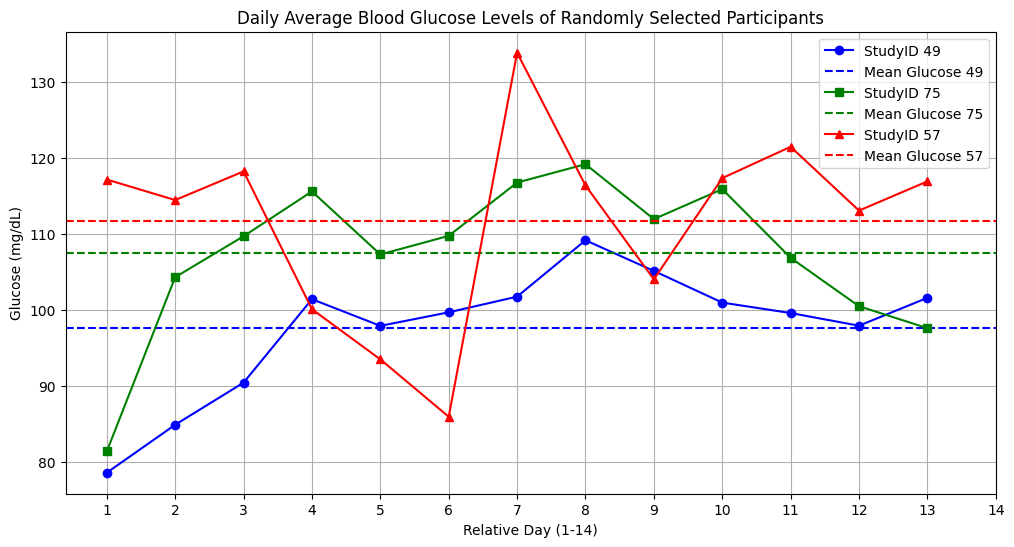


Daily GE Counts Table:
 StudyID  Relative_Day  GE_1SD_Filtered  GE_1_5SD_Filtered
      49             1                1                  0
      49             2                2                  2
      49             3                6                  4
      49             4                7                  2
      49             5                3                  2
      49             6                4                  2
      49             7                5                  5
      49             8                5                  6
      49             9                7                  2
      49            10                4                  3
      49            11                2                  1
      49            12                2                  1
      49            13                4                  4
      57             1                4                  3
      57             2                3                  2
      57             3          

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

# Load the dataset (modify the path if needed)
file_path = "glucose_Filtered_GE_counts.csv"
df = pd.read_csv(file_path)

# Ensure column names are clean (strip leading/trailing spaces)
df.columns = df.columns.str.strip()

# Verify correct column names
print("Dataset Columns:", df.columns)

# Define the correct column name for glucose measurement
glucose_col = "Glucose mg/dL" if "Glucose mg/dL" in df.columns else "Glucose_mg_dL"

# Compute daily average glucose values for each participant
df_daily_avg = df.groupby(["StudyID", "Relative_Day"])[glucose_col].mean().reset_index()

# Select 3 random participants
random_study_ids = random.sample(df["StudyID"].unique().tolist(), 3)

# Define markers and colors for each participant
markers = ['o', 's', '^']  # Circle, Square, Triangle
colors = ['blue', 'green', 'red']

# Compute overall mean glucose for dotted line
overall_mean = df[glucose_col].mean()

# Plot glucose levels over the experiment period
plt.figure(figsize=(12, 6))

# Plot daily average glucose levels for each participant
for i, study_id in enumerate(random_study_ids):
    subset = df_daily_avg[df_daily_avg["StudyID"] == study_id]

    # Plot daily average glucose with markers
    plt.plot(subset["Relative_Day"], subset[glucose_col], 
             linestyle='-', marker=markers[i], color=colors[i], label=f"StudyID {study_id}")

    # Plot participant-specific mean glucose as a dashed line
    mean_glucose = df[df["StudyID"] == study_id]["Mean_Glucose"].iloc[0]
    plt.axhline(y=mean_glucose, color=colors[i], linestyle='dashed', label=f"Mean Glucose {study_id}")

# Labels and title
plt.xlabel("Relative Day (1-14)")
plt.ylabel("Glucose (mg/dL)")
plt.title("Daily Average Blood Glucose Levels of Randomly Selected Participants")
plt.legend()
plt.xticks(np.arange(1, 15, 1))
plt.grid()

# Show the plot
plt.show()

# --------- TABLE GENERATION (Daily GE Counts) ---------

# Check if the correct filtered GE count columns exist
if "GE_1SD_Filtered" in df.columns and "GE_1_5SD_Filtered" in df.columns:
    ge_1sd_col, ge_1_5sd_col = "GE_1SD_Filtered", "GE_1_5SD_Filtered"
elif "GE_1SD" in df.columns and "GE_1.5SD" in df.columns:
    ge_1sd_col, ge_1_5sd_col = "GE_1SD", "GE_1.5SD"
else:
    raise ValueError("The required GE count columns are not found in the dataset.")

# Create a table showing daily GE counts for selected participants
df_ge_table = df[df["StudyID"].isin(random_study_ids)][["StudyID", "Relative_Day", ge_1sd_col, ge_1_5sd_col]]

# Remove duplicate entries within the same StudyID and Relative_Day (keeping the first occurrence)
df_ge_table = df_ge_table.drop_duplicates(subset=["StudyID", "Relative_Day"]).reset_index(drop=True)

# Print the table
print("\nDaily GE Counts Table:")
print(df_ge_table.to_string(index=False))

# blood glucose variations over a full day

## Visualizing GE Using 1SD and 1.5SD

## Defining GE with a 140 mg/dL Threshold

In [41]:
df

,StudyID,Timestamp,Glucose_mg_dL,Relative_Day,Mean_Glucose,Std_Glucose,Threshold_1SD,Threshold_1.5SD,GE_1SD_Filtered,GE_1_5SD_Filtered
0,1,2022-10-06 01:34:00,78,1,79.576598,16.228679,95.805278,103.919617,5,6
1,1,2022-10-06 01:49:00,76,1,79.576598,16.228679,95.805278,103.919617,5,6
2,1,2022-10-06 02:04:00,78,1,79.576598,16.228679,95.805278,103.919617,5,6
3,1,2022-10-06 02:19:00,75,1,79.576598,16.228679,95.805278,103.919617,5,6
4,1,2022-10-06 02:34:00,75,1,79.576598,16.228679,95.805278,103.919617,5,6
...,...,...,...,...,...,...,...,...,...,...
71712,89,2023-05-09 19:08:00,114,13,98.786058,17.435915,116.221973,124.939930,6,5
71713,89,2023-05-09 19:23:00,136,13,98.786058,17.435915,116.221973,124.939930,6,5
71714,89,2023-05-09 19:38:00,142,13,98.786058,17.435915,116.221973,124.939930,6,5
71715,89,2023-05-09 19:53:00,137,13,98.786058,17.435915,116.221973,124.939930,6,5


/var/folders/r0/h30ywvr55x98xwjf49klh76m0000gp/T/ipykernel_24228/1270704283.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_participants['Time'] = df_selected_participants['Timestamp'].dt.hour + df_selected_participants['Timestamp'].dt.minute / 60


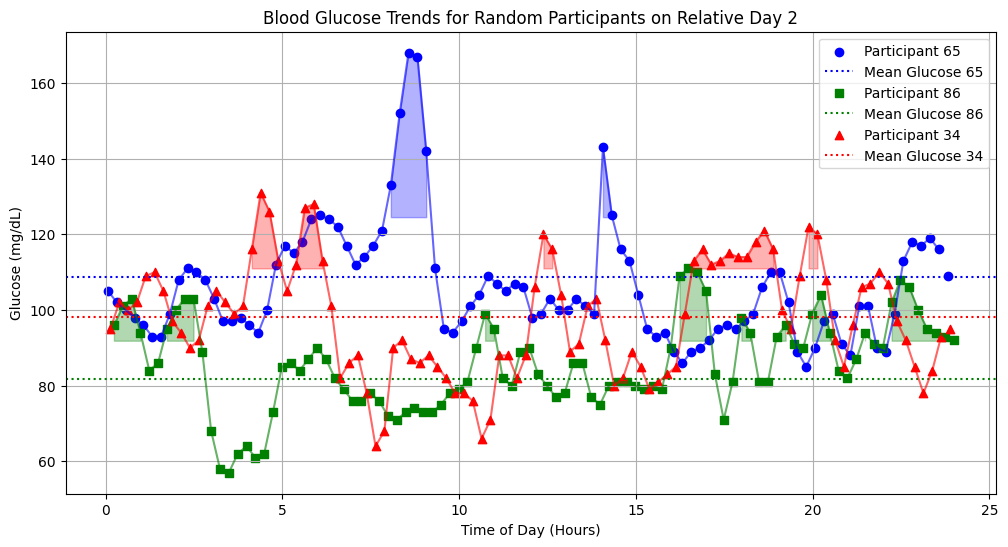

       Relative_Day  StudyID  GE_1SD_Filtered  GE_1_5SD_Filtered
20466             2       34                5                  5
47730             2       65                3                  2
68070             2       86                8                  7


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Select a random relative day
random_relative_day = random.choice(df['Relative_Day'].unique())

# Filter data for the selected relative day
df_selected_day = df[df['Relative_Day'] == random_relative_day]

# Select 3 random participants
random_participants = random.sample(list(df_selected_day['StudyID'].unique()), 3)

df_selected_participants = df_selected_day[df_selected_day['StudyID'].isin(random_participants)]

# Convert timestamps to relative time within the day
df_selected_participants['Time'] = df_selected_participants['Timestamp'].dt.hour + df_selected_participants['Timestamp'].dt.minute / 60

# Identify GE events where glucose exceeds threshold
def identify_ge_events(df, threshold_col):
    df['GE_Event'] = (df['Glucose_mg_dL'] > df[threshold_col]).astype(int)
    df['GE_Group'] = (df['GE_Event'].diff() != 0).cumsum() * df['GE_Event']
    return df

plt.figure(figsize=(12, 6))
markers = ['o', 's', '^']
colors = ['b', 'g', 'r']

for i, participant in enumerate(random_participants):
    df_participant = df_selected_participants[df_selected_participants['StudyID'] == participant]
    df_participant = df_participant.sort_values(by='Time')
    
    # Identify GE events for 1SD threshold
    df_participant = identify_ge_events(df_participant, 'Threshold_1SD')
    
    # Scatter plot for glucose values
    plt.scatter(df_participant['Time'], df_participant['Glucose_mg_dL'],
                label=f'Participant {participant}', marker=markers[i], color=colors[i])
    
    # Connect points without connecting first and last point
    plt.plot(df_participant['Time'].values[:-1], df_participant['Glucose_mg_dL'].values[:-1],
             color=colors[i], linestyle='-', alpha=0.6)
    
    # Highlight GE events
    for group in df_participant['GE_Group'].unique():
        if group == 0:
            continue
        df_ge = df_participant[df_participant['GE_Group'] == group]
        plt.fill_between(df_ge['Time'], df_ge['Glucose_mg_dL'], df_ge['Threshold_1SD'],
                         color=colors[i], alpha=0.3)
    
    # Mean glucose as a dotted line
    mean_glucose = df_participant['Mean_Glucose'].iloc[0]
    plt.axhline(y=mean_glucose, color=colors[i], linestyle='dotted', label=f'Mean Glucose {participant}')

plt.xlabel('Time of Day (Hours)')
plt.ylabel('Glucose (mg/dL)')
plt.title(f'Blood Glucose Trends for Random Participants on Relative Day {random_relative_day}')
plt.legend()
plt.grid()
plt.show()

# Table for GE_1SD_Filtered and GE_1.5SD_Filtered
table_data = df_selected_participants[['Relative_Day', 'StudyID', 'GE_1SD_Filtered', 'GE_1_5SD_Filtered']].drop_duplicates()
print(table_data)


/var/folders/r0/h30ywvr55x98xwjf49klh76m0000gp/T/ipykernel_24228/1069085453.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_participants['Time'] = df_selected_participants['Timestamp'].dt.hour + df_selected_participants['Timestamp'].dt.minute / 60


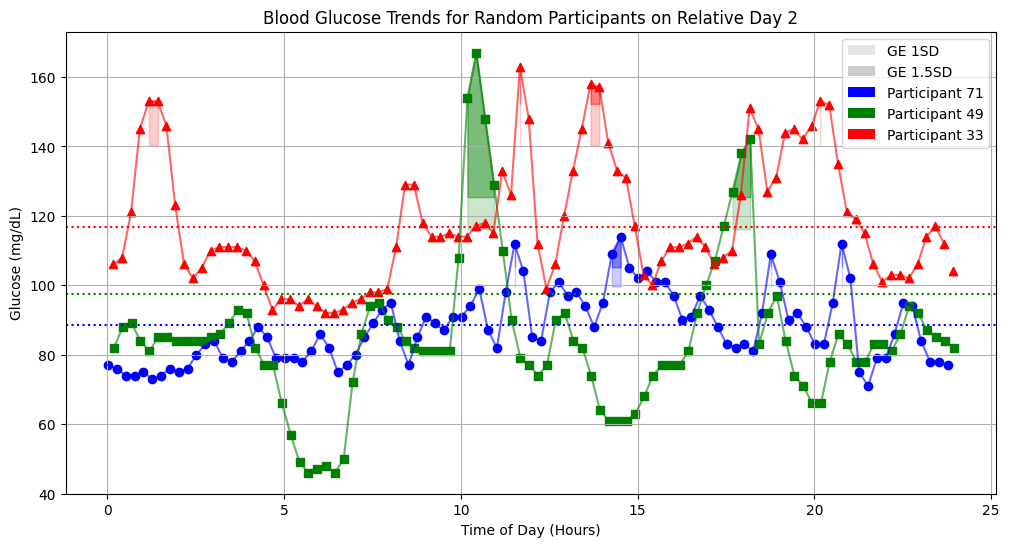

       Relative_Day  StudyID  GE_1SD_Filtered  GE_1_5SD_Filtered
19604             2       33                5                  4
32946             2       49                2                  2
53970             2       71                5                  4


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Select a random relative day
random_relative_day = random.choice(df['Relative_Day'].unique())

# Filter data for the selected relative day
df_selected_day = df[df['Relative_Day'] == random_relative_day]

# Select 3 random participants
random_participants = random.sample(list(df_selected_day['StudyID'].unique()), 3)

df_selected_participants = df_selected_day[df_selected_day['StudyID'].isin(random_participants)]

# Convert timestamps to relative time within the day
df_selected_participants['Time'] = df_selected_participants['Timestamp'].dt.hour + df_selected_participants['Timestamp'].dt.minute / 60

# Identify GE events where glucose exceeds threshold
def identify_ge_events(df, threshold_col):
    df['GE_Event'] = (df['Glucose_mg_dL'] > df[threshold_col]).astype(int)
    df['GE_Group'] = (df['GE_Event'].diff() != 0).cumsum() * df['GE_Event']
    return df

plt.figure(figsize=(12, 6))
markers = ['o', 's', '^']
colors = ['b', 'g', 'r']

for i, participant in enumerate(random_participants):
    df_participant = df_selected_participants[df_selected_participants['StudyID'] == participant]
    df_participant = df_participant.sort_values(by='Time')
    
    # Identify GE events for 1SD and 1.5SD thresholds
    df_participant = identify_ge_events(df_participant, 'Threshold_1SD')
    df_participant = identify_ge_events(df_participant, 'Threshold_1.5SD')
    
    # Scatter plot for glucose values
    plt.scatter(df_participant['Time'], df_participant['Glucose_mg_dL'],
                label=f'Participant {participant}', marker=markers[i], color=colors[i])
    
    # Connect points without connecting first and last point
    plt.plot(df_participant['Time'].values[:-1], df_participant['Glucose_mg_dL'].values[:-1],
             color=colors[i], linestyle='-', alpha=0.6)
    
    # Highlight GE events
    for group in df_participant['GE_Group'].unique():
        if group == 0:
            continue
        df_ge = df_participant[df_participant['GE_Group'] == group]
        
        # 1SD highlight (lighter color)
        plt.fill_between(df_ge['Time'], df_ge['Glucose_mg_dL'], df_ge['Threshold_1SD'],
                         color=colors[i], alpha=0.2)
        
        # 1.5SD highlight (darker color)
        plt.fill_between(df_ge['Time'], df_ge['Glucose_mg_dL'], df_ge['Threshold_1.5SD'],
                         color=colors[i], alpha=0.4)
    
    # Mean glucose as a dotted line
    mean_glucose = df_participant['Mean_Glucose'].iloc[0]
    plt.axhline(y=mean_glucose, color=colors[i], linestyle='dotted', label=f'Mean {participant}')

# Custom legend box
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='gray', alpha=0.2, label='GE 1SD'),
    Patch(facecolor='gray', alpha=0.4, label='GE 1.5SD')
]
for i, participant in enumerate(random_participants):
    legend_elements.append(Patch(facecolor=colors[i], label=f'Participant {participant}'))
plt.legend(handles=legend_elements, loc='upper right', frameon=True)

plt.xlabel('Time of Day (Hours)')
plt.ylabel('Glucose (mg/dL)')
plt.title(f'Blood Glucose Trends for Random Participants on Relative Day {random_relative_day}')
plt.grid()
plt.show()

# Table for GE_1SD_Filtered and GE_1.5SD_Filtered
table_data = df_selected_participants[['Relative_Day', 'StudyID', 'GE_1SD_Filtered', 'GE_1_5SD_Filtered']].drop_duplicates()
print(table_data)

/var/folders/r0/h30ywvr55x98xwjf49klh76m0000gp/T/ipykernel_24228/1069085453.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_participants['Time'] = df_selected_participants['Timestamp'].dt.hour + df_selected_participants['Timestamp'].dt.minute / 60


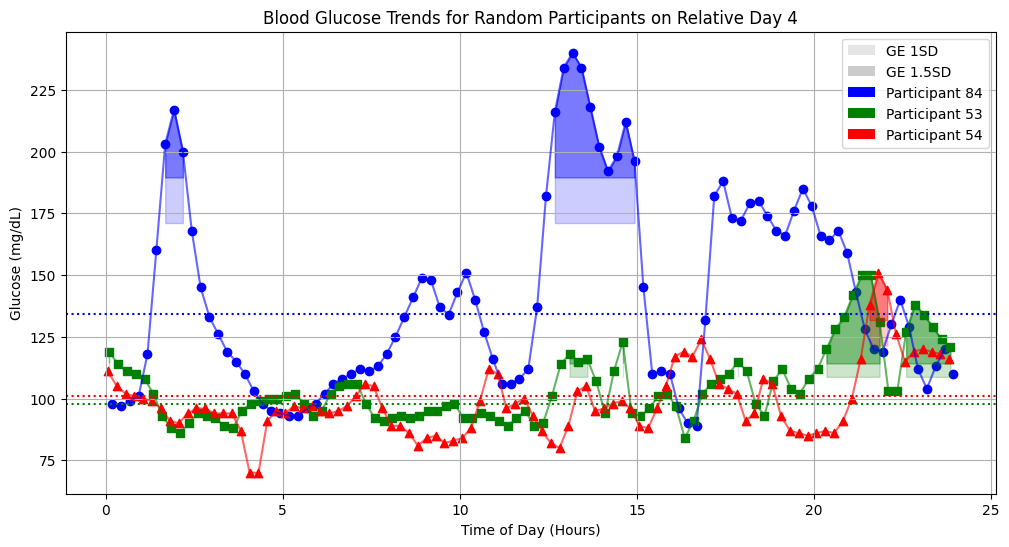

       Relative_Day  StudyID  GE_1SD_Filtered  GE_1_5SD_Filtered
36786             4       53                6                  5
37938             4       54                2                  1
65861             4       84                4                  2


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Select a random relative day
random_relative_day = random.choice(df['Relative_Day'].unique())

# Filter data for the selected relative day
df_selected_day = df[df['Relative_Day'] == random_relative_day]

# Select 3 random participants
random_participants = random.sample(list(df_selected_day['StudyID'].unique()), 3)

df_selected_participants = df_selected_day[df_selected_day['StudyID'].isin(random_participants)]

# Convert timestamps to relative time within the day
df_selected_participants['Time'] = df_selected_participants['Timestamp'].dt.hour + df_selected_participants['Timestamp'].dt.minute / 60

# Identify GE events where glucose exceeds threshold
def identify_ge_events(df, threshold_col):
    df['GE_Event'] = (df['Glucose_mg_dL'] > df[threshold_col]).astype(int)
    df['GE_Group'] = (df['GE_Event'].diff() != 0).cumsum() * df['GE_Event']
    return df

plt.figure(figsize=(12, 6))
markers = ['o', 's', '^']
colors = ['b', 'g', 'r']

for i, participant in enumerate(random_participants):
    df_participant = df_selected_participants[df_selected_participants['StudyID'] == participant]
    df_participant = df_participant.sort_values(by='Time')
    
    # Identify GE events for 1SD and 1.5SD thresholds
    df_participant = identify_ge_events(df_participant, 'Threshold_1SD')
    df_participant = identify_ge_events(df_participant, 'Threshold_1.5SD')
    
    # Scatter plot for glucose values
    plt.scatter(df_participant['Time'], df_participant['Glucose_mg_dL'],
                label=f'Participant {participant}', marker=markers[i], color=colors[i])
    
    # Connect points without connecting first and last point
    plt.plot(df_participant['Time'].values[:-1], df_participant['Glucose_mg_dL'].values[:-1],
             color=colors[i], linestyle='-', alpha=0.6)
    
    # Highlight GE events
    for group in df_participant['GE_Group'].unique():
        if group == 0:
            continue
        df_ge = df_participant[df_participant['GE_Group'] == group]
        
        # 1SD highlight (lighter color)
        plt.fill_between(df_ge['Time'], df_ge['Glucose_mg_dL'], df_ge['Threshold_1SD'],
                         color=colors[i], alpha=0.2)
        
        # 1.5SD highlight (darker color)
        plt.fill_between(df_ge['Time'], df_ge['Glucose_mg_dL'], df_ge['Threshold_1.5SD'],
                         color=colors[i], alpha=0.4)
    
    # Mean glucose as a dotted line
    mean_glucose = df_participant['Mean_Glucose'].iloc[0]
    plt.axhline(y=mean_glucose, color=colors[i], linestyle='dotted', label=f'Mean {participant}')

# Custom legend box
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='gray', alpha=0.2, label='GE 1SD'),
    Patch(facecolor='gray', alpha=0.4, label='GE 1.5SD')
]
for i, participant in enumerate(random_participants):
    legend_elements.append(Patch(facecolor=colors[i], label=f'Participant {participant}'))
plt.legend(handles=legend_elements, loc='upper right', frameon=True)

plt.xlabel('Time of Day (Hours)')
plt.ylabel('Glucose (mg/dL)')
plt.title(f'Blood Glucose Trends for Random Participants on Relative Day {random_relative_day}')
plt.grid()
plt.show()

# Table for GE_1SD_Filtered and GE_1.5SD_Filtered
table_data = df_selected_participants[['Relative_Day', 'StudyID', 'GE_1SD_Filtered', 'GE_1_5SD_Filtered']].drop_duplicates()
print(table_data)

## GE were counted based on the SD criterion, but visualization showed instances where GE was detected below 140 mg/dL. 
## Therefore, incorporating an absolute glucose threshold (140 mg/dL) appears to be a more appropriate approach.